In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

In [2]:
def weighted_quantile(values, quantiles, weights, values_sorted=False):

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        weights = weights[sorter]

    weighted_quantiles = np.cumsum(weights)
    weighted_quantiles /= np.sum(weights)
    
    return np.interp(quantiles, weighted_quantiles, values)

## Radio

In [3]:
fonseca_j0740 = pd.read_csv('RADIO/Fonseca_J0740.csv')
fonseca_j0740

,m,Prior
0,2.054977,1.0
1,2.123523,1.0
2,2.104135,1.0
3,2.186385,1.0
4,2.057193,1.0
...,...,...
495,2.044222,1.0
496,2.095235,1.0
497,2.067672,1.0
498,2.079548,1.0


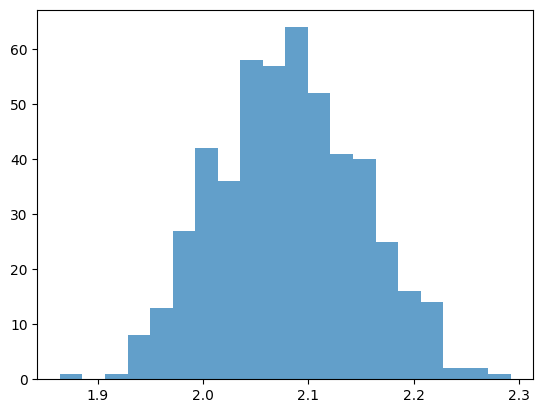

In [4]:
fig, ax = plt.subplots()
ax.hist(fonseca_j0740['m'], bins=20, alpha=0.7);

In [5]:
np.median(fonseca_j0740['m'])

2.079371646632039

In [6]:
np.std(fonseca_j0740['m'])

0.0680048534115419

In [7]:
q5, q50, q95 = np.percentile(fonseca_j0740['m'], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 2.08 +0.12 -0.11


In [8]:
antoniadis_j0348 = pd.read_csv('RADIO/Antoniadis_J0348.csv')
antoniadis_j0348

,m
0,2.026639
1,2.032199
2,1.927949
3,1.998158
4,2.122444
...,...
4995,2.049538
4996,2.015583
4997,2.013706
4998,2.026811


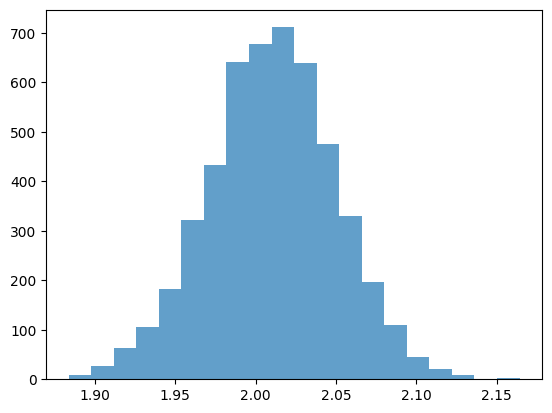

In [9]:
fig, ax = plt.subplots()
ax.hist(antoniadis_j0348['m'], bins=20, alpha=0.7);

In [10]:
np.median(antoniadis_j0348['m'])

2.0106725

In [11]:
np.std(antoniadis_j0348['m'])

0.03962040890814833

In [12]:
q5, q50, q95 = np.percentile(antoniadis_j0348['m'], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 2.01 +0.06 -0.07


## X-ray

In [13]:
miller_j0030 = pd.read_csv('XRAY/Miller_J0030_three-spot.csv')
miller_j0030

,M,R,Prior
0,1.271598,11.478447,0.009651
1,1.422916,12.334620,0.009352
2,1.476175,13.355072,0.008276
3,1.337390,12.366469,0.008745
4,1.521980,12.805979,0.009281
...,...,...,...
9995,1.577333,15.439616,0.006617
9996,1.421327,12.419297,0.009215
9997,1.294715,12.626914,0.008120
9998,1.437254,13.070312,0.008413


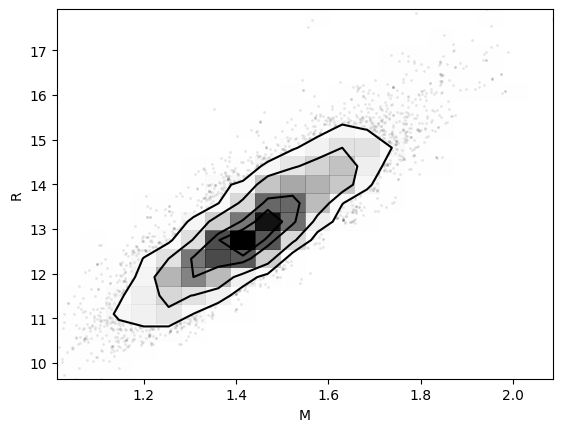

In [26]:
fig, ax = plt.subplots()

corner.hist2d(
    miller_j0030['M'].values, 
    miller_j0030['R'].values,
    # I believe this is how the weights should be used...
    weights=np.exp(-miller_j0030['Prior'].values),
    ax=ax
)

ax.set_xlabel('M')
ax.set_ylabel('R');

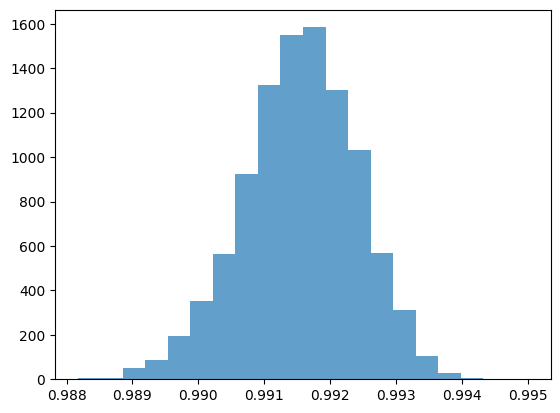

In [27]:
fig, ax = plt.subplots()
ax.hist(np.exp(-miller_j0030['Prior']), bins=20, alpha=0.7);

In [28]:
miller_j0030_alt = np.genfromtxt('XRAY/miller_j0030/J0030_3spot_RM.txt')
miller_j0030_alt

array([[13.23304384,  1.41662876],
       [13.48562066,  1.49345071],
       [14.67699757,  1.59270706],
       ...,
       [11.34809041,  1.27147891],
       [14.01416672,  1.49922002],
       [13.10471651,  1.40555073]])

In [29]:
# If the prior weights are to convert from flat in compactness to flat in 
# radius, then I think the weights should be calculated as follows:
custom_weights_alt = miller_j0030_alt[:, 0]**2/miller_j0030_alt[:, 1]
custom_weights_alt /= np.sum(custom_weights_alt)

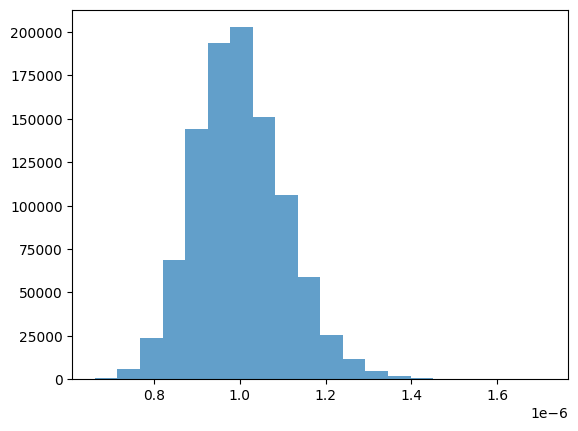

In [30]:
fig, ax = plt.subplots()
ax.hist(custom_weights_alt, bins=20, alpha=0.7);

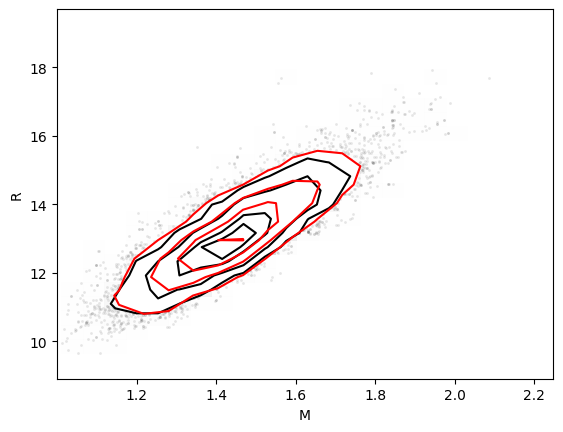

In [31]:
fig, ax = plt.subplots()

corner.hist2d(
    miller_j0030['M'].values, 
    miller_j0030['R'].values, 
    weights=np.exp(-miller_j0030['Prior'].values),
    ax=ax
)

corner.hist2d(
    miller_j0030_alt[:, 1], 
    miller_j0030_alt[:, 0], 
    weights=custom_weights_alt,
    color='red',
    plot_datapoints=False,
    plot_density=False,
    ax=ax
)

ax.set_xlabel('M')
ax.set_ylabel('R');

The Prior weights essentially make no difference:

In [32]:
q5, q50, q95 = np.percentile(miller_j0030['M'], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = np.percentile(miller_j0030['R'].values, q=[5, 50, 95])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 1.44 +0.25 -0.24
R = 13.01 +2.01 -1.80


In [33]:
q5, q50, q95 = weighted_quantile(miller_j0030['M'].values, [0.05, 0.5, 0.95], np.exp(-miller_j0030['Prior'].values))
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = weighted_quantile(miller_j0030['R'].values, [0.05, 0.5, 0.95], np.exp(-miller_j0030['Prior'].values))
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 1.44 +0.25 -0.24
R = 13.01 +2.01 -1.80


But my own weights make a larger difference. How are the weights in the 'Prior' column calculated?

In [24]:
q5, q50, q95 = np.percentile(miller_j0030_alt[:, 1], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = np.percentile(miller_j0030_alt[:, 0], [5, 50, 95])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 1.44 +0.25 -0.23
R = 13.01 +2.06 -1.79


In [25]:
q5, q50, q95 = weighted_quantile(miller_j0030_alt[:, 1], [0.05, 0.5, 0.95], custom_weights_alt)
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = weighted_quantile(miller_j0030_alt[:, 0], [0.05, 0.5, 0.95], custom_weights_alt)
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 1.45 +0.25 -0.24
R = 13.12 +2.05 -1.79


Note that in http://arxiv.org/abs/1912.05705 when they said median they are quoting the means...

In [34]:
np.mean(miller_j0030_alt[:, 0]), np.mean(miller_j0030_alt[:, 1])

(13.08840133785858, 1.4427229788191855)

In [35]:
miller_j0740 = pd.read_csv('XRAY/Miller_J0740.csv')
miller_j0740

,R,M,Prior,jacobian_C2R,prior_J0740mass,no_adjustment
0,14.15501,2.10137,-4.965061,-4.732156,-0.407513,-0.174609
1,13.72271,2.11313,-8.096848,-7.889780,-3.606914,-3.399846
2,11.40361,2.15069,-3.916210,-3.866340,0.185861,0.235731
3,12.51597,2.16642,-4.214448,-4.264204,0.066487,0.016731
4,11.81440,2.16588,-5.950447,-5.996452,-1.784636,-1.830640
...,...,...,...,...,...,...
11995,11.89365,2.07919,-6.749800,-6.498512,-2.529769,-2.278481
11996,12.98397,1.96105,-4.519374,-4.838444,-0.065423,-0.384493
11997,11.77926,2.05199,-5.519362,-5.299675,-1.305491,-1.085804
11998,12.07199,1.98085,-4.734345,-4.879331,-0.436095,-0.581081


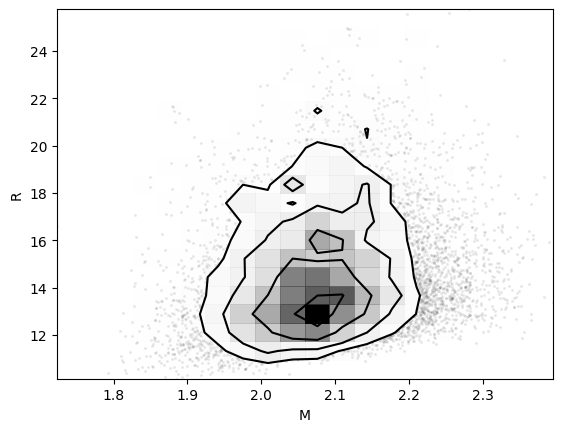

In [36]:
fig, ax = plt.subplots()

corner.hist2d(
    miller_j0740['M'].values, 
    miller_j0740['R'].values, 
    weights=np.exp(-miller_j0740['Prior'].values),
    ax=ax
)

ax.set_xlabel('M')
ax.set_ylabel('R');

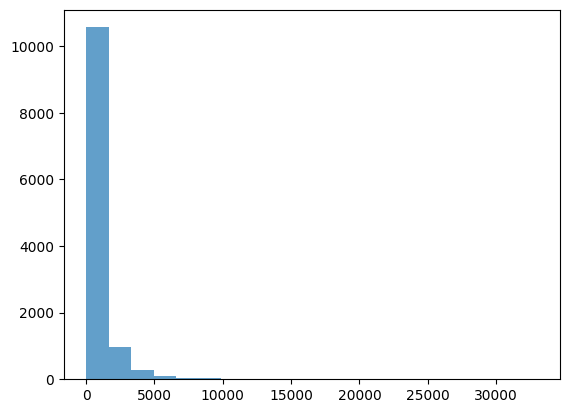

In [38]:
fig, ax = plt.subplots()
ax.hist(np.exp(-miller_j0740['Prior']), bins=20, alpha=0.7);

In [39]:
miller_j0740_alt = np.genfromtxt('XRAY/miller_j0740/NICER+XMM_J0740_RM.txt')
miller_j0740_alt

array([[12.00646,  2.05721,  2.27346],
       [11.77895,  1.95365,  3.65829],
       [20.91851,  2.19253,  0.74429],
       ...,
       [12.23124,  1.89538,  6.23618],
       [12.22814,  1.89378, 72.6253 ],
       [12.2154 ,  1.88766,  8.04108]])

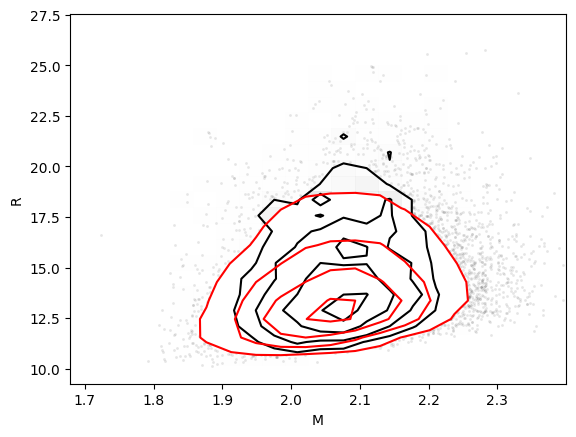

In [40]:
fig, ax = plt.subplots()

corner.hist2d(
    miller_j0740['M'].values, 
    miller_j0740['R'].values, 
    weights=np.exp(-miller_j0740['Prior'].values),
    ax=ax
)

corner.hist2d(
    miller_j0740_alt[:, 1], 
    miller_j0740_alt[:, 0], 
    weights=miller_j0740_alt[:, 2],
    color='red',
    plot_datapoints=False,
    plot_density=False,
    ax=ax
)

ax.set_xlabel('M')
ax.set_ylabel('R');

In [41]:
q5, q50, q95 = np.percentile(miller_j0740['M'], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = np.percentile(miller_j0740['R'].values, q=[5, 50, 95])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 2.09 +0.15 -0.15
R = 13.58 +4.45 -2.03


Below agrees with what is in http://arxiv.org/abs/2106.05313 (so I think this is flat in radius, which is different prior to what Miller used).

In [42]:
q5, q50, q95 = weighted_quantile(miller_j0740['M'].values, [0.05, 0.5, 0.95], np.exp(-miller_j0740['Prior'].values))
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = weighted_quantile(miller_j0740['R'].values, [0.05, 0.5, 0.95], np.exp(-miller_j0740['Prior'].values))
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 2.07 +0.11 -0.12
R = 14.30 +5.61 -2.49


In [43]:
q5, q50, q95 = np.percentile(miller_j0740_alt[:, 1], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = np.percentile(miller_j0740_alt[:, 0], [5, 50, 95])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 2.09 +0.15 -0.15
R = 13.59 +4.56 -2.03


In [44]:
q5, q50, q95 = weighted_quantile(miller_j0740_alt[:, 1], [0.05, 0.5, 0.95], miller_j0740_alt[:, 2])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = weighted_quantile(miller_j0740_alt[:, 0], [0.16, 0.5, 0.], miller_j0740_alt[:, 2])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 2.06 +0.15 -0.15
R = 13.71 +-4.45 -1.50


What they quote in the abstract of http://arxiv.org/abs/2105.06979:

In [45]:
q5, q50, q95 = weighted_quantile(miller_j0740_alt[:, 0], [0.16, 0.5, 0.84], miller_j0740_alt[:, 2])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

R = 13.71 +2.59 -1.50


I haven't tried to reproduce the flat-in-radius weights, because Miller use a normal for their mass prior...

In [47]:
choudhury_j0437 = pd.read_csv('XRAY/Choudhury_J0437_headline.csv')
choudhury_j0437

,M,R,cos(inclination),logL,log(prior),Prior
0,1.450115,11.659765,-0.737628,-35584.513728,0.0,1.0
1,1.478807,12.095283,-0.737143,-35582.601803,0.0,1.0
2,1.452432,14.142830,-0.737163,-35586.524814,0.0,1.0
3,1.371363,12.391665,-0.737468,-35585.418133,0.0,1.0
4,1.409994,13.104898,-0.737401,-35586.060853,0.0,1.0
...,...,...,...,...,...,...
9995,1.418244,11.132948,-0.737218,-35587.278108,0.0,1.0
9996,1.395715,10.905114,-0.737366,-35585.441054,0.0,1.0
9997,1.461659,11.144910,-0.737218,-35583.462503,0.0,1.0
9998,1.449561,12.418537,-0.737404,-35585.576144,0.0,1.0


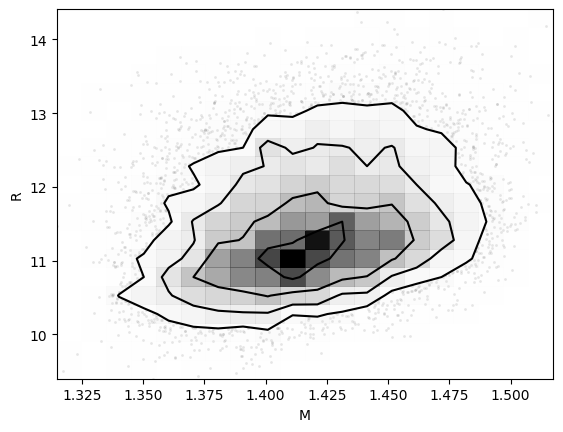

In [48]:
fig, ax = plt.subplots()

corner.hist2d(
    choudhury_j0437['M'].values, 
    choudhury_j0437['R'].values, 
    ax=ax
)

ax.set_xlabel('M')
ax.set_ylabel('R');

In [49]:
choudhury_j0437_alt = np.loadtxt('XRAY/choudhury_j0437/samples/J0437_3C50_BKG_AGN_hiMN_lowXPSI_mrsamples_post_equal_weights.dat')
choudhury_j0437_alt

array([[ 1.37663979, 10.2454206 ],
       [ 1.37385656,  9.2324232 ],
       [ 1.37120214, 10.19589858],
       ...,
       [ 1.40683215, 11.99948356],
       [ 1.40352248, 11.56560137],
       [ 1.40162582, 12.21689994]])

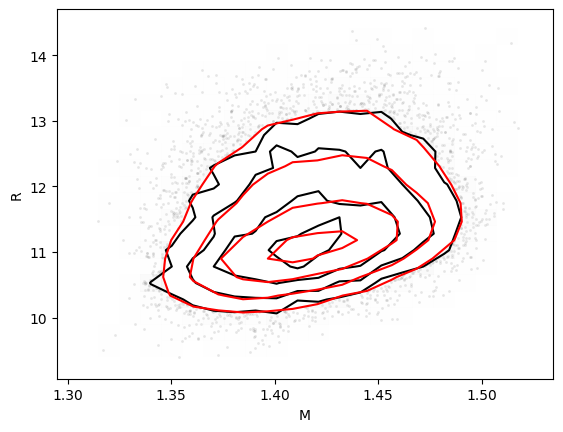

In [51]:
fig, ax = plt.subplots()

corner.hist2d(
    choudhury_j0437['M'].values, 
    choudhury_j0437['R'].values, 
    ax=ax
)

corner.hist2d(
    choudhury_j0437_alt[:, 0], 
    choudhury_j0437_alt[:, 1], 
    color='red',
    plot_datapoints=False,
    plot_density=False,
    ax=ax
)

ax.set_xlabel('M')
ax.set_ylabel('R');

In [52]:
q5, q50, q95 = np.percentile(choudhury_j0437['M'], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = np.percentile(choudhury_j0437['R'].values, q=[5, 50, 95])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 1.42 +0.06 -0.06
R = 11.37 +1.61 -0.99


In [53]:
q5, q50, q95 = np.percentile(choudhury_j0437_alt[:, 0], [5, 50, 95])
print(f'M = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

q5, q50, q95 = np.percentile(choudhury_j0437_alt[:, 1], [5, 50, 95])
print(f'R = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

M = 1.42 +0.06 -0.06
R = 11.36 +1.62 -0.98


## GW

In [3]:
gw170817 = pd.read_csv('GW/LVC_GW170817_PhenomPNRT-lo.csv')
gw170817

,luminosity_distance_Mpc,m1_detector_frame_Msun,m2_detector_frame_Msun,Lambda1,Lambda2,m1,m2,Prior
0,46.592698,1.415062,1.337468,317.922828,688.927043,1.400328,1.323543,0.979285
1,44.958181,1.384693,1.366761,929.833080,423.998577,1.370776,1.353024,0.980000
2,33.614123,1.506041,1.258329,79.826312,8.993758,1.494695,1.248849,0.984990
3,40.743386,1.494205,1.268191,736.464881,703.334173,1.480583,1.256630,0.981850
4,42.934901,1.385781,1.365544,567.738176,619.811990,1.372475,1.352432,0.980888
...,...,...,...,...,...,...,...,...
3947,43.343487,1.560425,1.216359,7.552828,1266.760942,1.545300,1.204569,0.980708
3948,32.751410,1.521873,1.245805,411.521461,287.583640,1.510700,1.236659,0.985371
3949,33.650802,1.582990,1.200103,289.120023,699.511741,1.571051,1.191052,0.984974
3950,38.354219,1.473697,1.285122,42.882920,577.522946,1.461043,1.274087,0.982900


In [4]:
gw170817_alt = pd.read_csv('GW/low_spin_PhenomPNRT_posterior_samples.dat', sep=' ')
gw170817_alt

,costheta_jn,luminosity_distance_Mpc,m1_detector_frame_Msun,m2_detector_frame_Msun,lambda1,lambda2,spin1,spin2,costilt1,costilt2
0,-0.928385,46.592698,1.415062,1.337468,317.922828,688.927043,0.019260,0.000145,-0.078864,0.426047
1,-0.950661,44.958181,1.384693,1.366761,929.833080,423.998577,0.014741,0.036313,0.310979,0.089288
2,-0.655829,33.614123,1.506041,1.258329,79.826312,8.993758,0.025088,0.032998,0.063026,-0.237249
3,-0.896547,40.743386,1.494205,1.268191,736.464881,703.334173,0.039184,0.023670,0.060257,0.297033
4,-0.898358,42.934901,1.385781,1.365544,567.738176,619.811990,0.010972,0.007950,0.024044,-0.408662
...,...,...,...,...,...,...,...,...,...,...
3947,-0.929768,43.343487,1.560425,1.216359,7.552828,1266.760942,0.032769,0.017006,0.523142,-0.622493
3948,-0.672457,32.751410,1.521873,1.245805,411.521461,287.583640,0.003857,0.020003,-0.523825,0.393337
3949,-0.689140,33.650802,1.582990,1.200103,289.120023,699.511741,0.031268,0.004283,0.642345,0.281508
3950,-0.794319,38.354219,1.473697,1.285122,42.882920,577.522946,0.041621,0.022387,-0.173701,0.037826


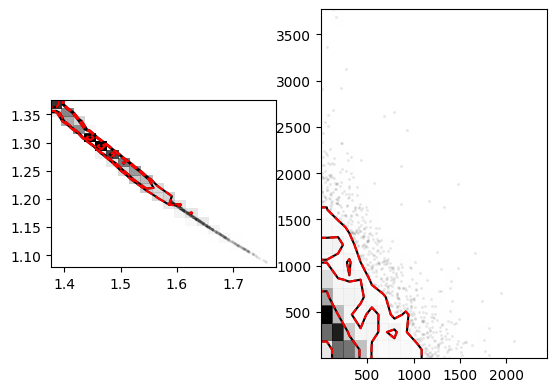

In [7]:
fig, axs = plt.subplots(1, 2)

for ax in axs:
    ax.set_aspect('equal')

corner.hist2d(
    gw170817['m1_detector_frame_Msun'].values, 
    gw170817['m2_detector_frame_Msun'].values, 
    ax=axs[0]
)

corner.hist2d(
    gw170817['Lambda1'].values, 
    gw170817['Lambda2'].values, 
    ax=axs[1]
)

corner.hist2d(
    gw170817_alt['m1_detector_frame_Msun'].values, 
    gw170817_alt['m2_detector_frame_Msun'].values, 
    ax=axs[0],
    color='red',
    plot_datapoints=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '--'}
)

corner.hist2d(
    gw170817_alt['lambda1'].values, 
    gw170817_alt['lambda2'].values, 
    ax=axs[1],
    color='red',
    plot_datapoints=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '--'}
)

In [12]:
q5, q50, q95 = np.percentile(gw170817['m1'].values, [5, 50, 95])
print(f'm1 = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

m1 = 1.48 +0.16 -0.10


In [10]:
q5, q50, q95 = np.percentile(gw170817['m2'].values, [5, 50, 95])
print(f'm2 = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

m2 = 1.26 +0.09 -0.11


In [17]:
np.percentile(gw170817['Lambda1'].values, [90])

array([803.14404081])

In [18]:
np.percentile(gw170817['Lambda2'].values, [90])

array([1228.58438344])

In [19]:
gw190425 = pd.read_csv('GW/PE190425_low_spin_bilby.csv')
gw190425

,m1,m2,Lambda1,Lambda2,luminosity_distance_Mpc
0,2.480030,1.168903,118.217382,185.876894,77.605094
1,2.001303,1.364632,327.672757,841.560678,169.573808
2,2.047739,1.393366,590.886413,73.043678,66.952303
3,1.736865,1.608382,229.610965,124.794236,99.289485
4,2.008607,1.393608,163.680992,2412.459358,109.693936
...,...,...,...,...,...
9995,2.594044,1.099089,106.234735,399.037690,137.884310
9996,2.902666,1.014605,100.503074,6019.073363,103.701107
9997,2.583652,1.096846,230.271404,4136.034292,151.725081
9998,1.890006,1.480556,1379.548004,361.991149,100.934693


In [20]:
import h5py

In [21]:
data = h5py.File('GW/gw190425.h5', 'r')

In [22]:
data.keys()

<KeysViewHDF5 ['PhenomDNRT-HS', 'PhenomDNRT-LS', 'PhenomPNRT-HS', 'PhenomPNRT-LS', 'TaylorF2-HS', 'TaylorF2-LS', 'version']>

In [27]:
gw190425_alt = pd.DataFrame(np.array(data['PhenomPNRT-HS']['posterior_samples']))
gw190425_alt

,L1_matched_filter_abs_snr,L1_matched_filter_snr_angle,L1_optimal_snr,L1_spcal_amp_0,L1_spcal_amp_1,L1_spcal_amp_2,L1_spcal_amp_3,L1_spcal_amp_4,L1_spcal_amp_5,L1_spcal_amp_6,...,mass_2_source,total_mass_source,chirp_mass_source,final_mass_source_non_evolved,radiated_energy_non_evolved,L1_time,V1_time,L1_matched_filter_snr,V1_matched_filter_snr,cos_iota
0,11.317063,-0.153018,10.591620,0.014980,-0.035563,-0.003982,0.008152,-0.001600,0.021336,-0.007247,...,1.111761,3.629437,1.432976,3.489602,0.139836,1.240216e+09,1.240216e+09,11.184830,0.413358,-0.611347
1,11.764008,-0.188382,9.860370,0.037989,0.032072,-0.000928,0.010673,0.000145,0.029770,0.009953,...,1.224550,3.391645,1.406794,3.243857,0.147787,1.240216e+09,1.240216e+09,11.555885,-1.166407,-0.974252
2,11.768249,0.072892,9.137407,-0.016631,-0.028126,-0.092956,0.022123,-0.017165,0.000519,0.004518,...,1.338649,3.338802,1.418796,3.181741,0.157061,1.240216e+09,1.240216e+09,11.736999,0.567458,0.911530
3,11.772802,0.190375,12.654532,0.018228,-0.021532,0.014207,-0.009766,0.003299,-0.000053,-0.002639,...,1.174654,3.553710,1.437648,3.405146,0.148564,1.240216e+09,1.240216e+09,11.560106,-0.586201,-0.772468
4,11.219922,-0.064447,11.070634,-0.006931,0.014169,0.013390,-0.008677,-0.023082,0.006843,0.006093,...,1.617640,3.346996,1.455891,3.183834,0.163162,1.240216e+09,1.240216e+09,11.196629,1.789614,-0.634553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226593,12.805252,0.082078,11.654437,-0.023740,0.029070,0.001840,0.008908,-0.055932,0.015697,0.027005,...,1.199036,3.610188,1.462609,3.456804,0.153384,1.240216e+09,1.240216e+09,12.762144,2.844892,-0.107583
226594,12.859937,0.037742,12.429702,-0.032420,0.018846,-0.058732,-0.017905,0.025851,-0.031894,0.014440,...,1.203709,3.568875,1.452525,3.417192,0.151683,1.240216e+09,1.240216e+09,12.850779,2.092762,-0.210488
226595,12.736780,-0.036776,12.414858,0.018299,0.025837,-0.028235,-0.000183,0.012872,0.002799,0.024368,...,1.221968,3.580888,1.462399,3.425442,0.155446,1.240216e+09,1.240216e+09,12.728168,2.820031,-0.325684
226596,12.830848,0.051466,11.668914,-0.035206,-0.006289,-0.089906,-0.002039,0.009936,0.033469,-0.015912,...,1.162747,3.635290,1.455692,3.492158,0.143131,1.240216e+09,1.240216e+09,12.813859,2.771301,0.583744


In [28]:
list(gw190425_alt.columns)

['L1_matched_filter_abs_snr',
 'L1_matched_filter_snr_angle',
 'L1_optimal_snr',
 'L1_spcal_amp_0',
 'L1_spcal_amp_1',
 'L1_spcal_amp_2',
 'L1_spcal_amp_3',
 'L1_spcal_amp_4',
 'L1_spcal_amp_5',
 'L1_spcal_amp_6',
 'L1_spcal_amp_7',
 'L1_spcal_amp_8',
 'L1_spcal_amp_9',
 'L1_spcal_phase_0',
 'L1_spcal_phase_1',
 'L1_spcal_phase_2',
 'L1_spcal_phase_3',
 'L1_spcal_phase_4',
 'L1_spcal_phase_5',
 'L1_spcal_phase_6',
 'L1_spcal_phase_7',
 'L1_spcal_phase_8',
 'L1_spcal_phase_9',
 'V1_matched_filter_abs_snr',
 'V1_matched_filter_snr_angle',
 'V1_optimal_snr',
 'V1_spcal_amp_0',
 'V1_spcal_amp_1',
 'V1_spcal_amp_2',
 'V1_spcal_amp_3',
 'V1_spcal_amp_4',
 'V1_spcal_amp_5',
 'V1_spcal_amp_6',
 'V1_spcal_amp_7',
 'V1_spcal_amp_8',
 'V1_spcal_amp_9',
 'V1_spcal_phase_0',
 'V1_spcal_phase_1',
 'V1_spcal_phase_2',
 'V1_spcal_phase_3',
 'V1_spcal_phase_4',
 'V1_spcal_phase_5',
 'V1_spcal_phase_6',
 'V1_spcal_phase_7',
 'V1_spcal_phase_8',
 'V1_spcal_phase_9',
 'azimuth',
 'cosalpha',
 'cos_theta_j

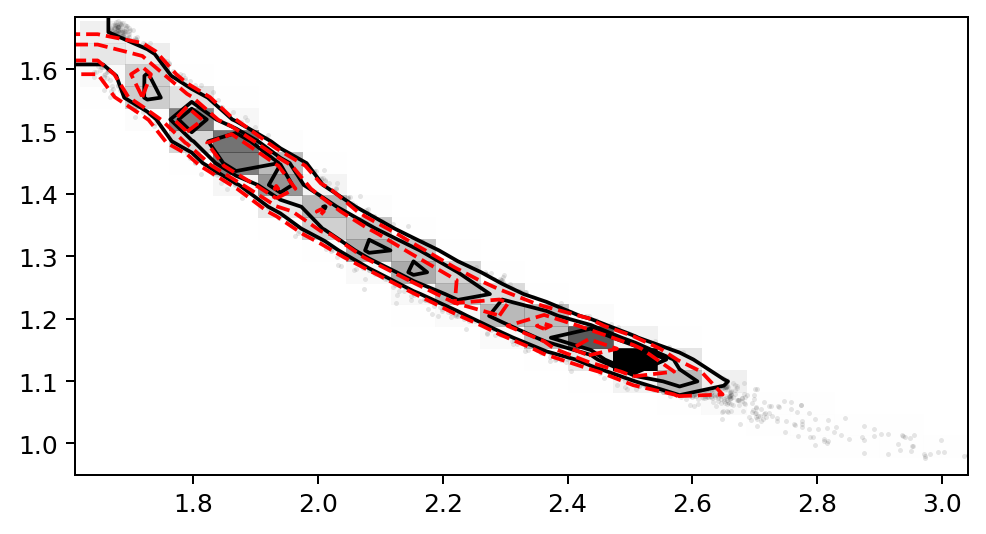

In [29]:
fig, ax = plt.subplots(dpi=180)

ax.set_aspect('equal')

corner.hist2d(
    gw190425['m1'].values, 
    gw190425['m2'].values, 
    ax=ax
)

corner.hist2d(
    gw190425_alt['mass_1_source'].values, 
    gw190425_alt['mass_2_source'].values, 
    ax=ax,
    color='red',
    plot_datapoints=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '--'}
)

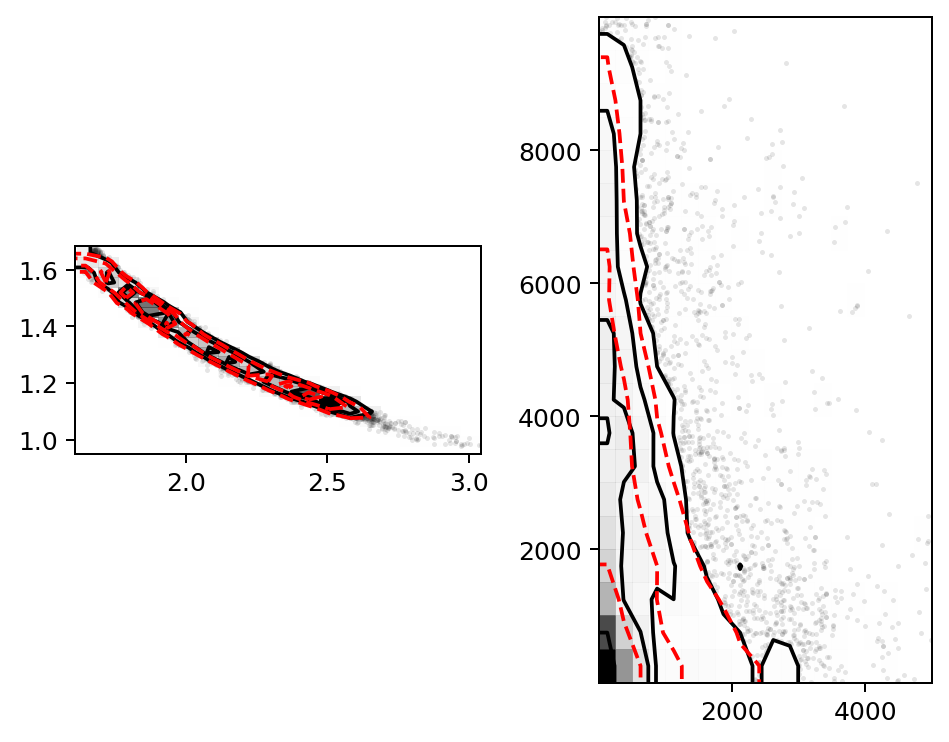

In [30]:
fig, axs = plt.subplots(1, 2, dpi=180)

for ax in axs:
    ax.set_aspect('equal')

corner.hist2d(
    gw190425['m1'].values, 
    gw190425['m2'].values, 
    ax=axs[0]
)

corner.hist2d(
    gw190425['Lambda1'].values, 
    gw190425['Lambda2'].values, 
    ax=axs[1]
)

corner.hist2d(
    gw190425_alt['mass_1_source'].values, 
    gw190425_alt['mass_2_source'].values, 
    ax=axs[0],
    color='red',
    plot_datapoints=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '--'}
)

corner.hist2d(
    gw190425_alt['lambda_1'].values, 
    gw190425_alt['lambda_2'].values, 
    ax=axs[1],
    color='red',
    plot_datapoints=False,
    plot_density=False,
    no_fill_contours=True,
    contour_kwargs={'linestyles': '--'}
)

In [31]:
q5, q50, q95 = np.percentile(gw190425['m1'].values, [5, 50, 95])
print(f'm1 = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

m1 = 2.10 +0.48 -0.39


In [32]:
q5, q50, q95 = np.percentile(gw190425_alt['mass_1_source'], [5, 50, 95])
print(f'm1 = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

m1 = 2.02 +0.58 -0.34


In [34]:
q5, q50, q95 = np.percentile(gw190425_alt['mass_2_source'], [5, 50, 95])
print(f'm2 = {q50:.2f} +{q95-q50:.2f} -{q50-q5:.2f}')

m2 = 1.35 +0.26 -0.26


In [36]:
np.percentile(gw190425_alt['lambda_1'].values, [90])

array([1501.46764174])

In [37]:
np.percentile(gw190425_alt['lambda_2'].values, [90])

array([5689.94233023])